# Seaborn
Luis e Pedro

Links úteis:  
* https://seaborn.pydata.org/index.html
* https://seaborn.pydata.org/tutorial/function_overview.html
* https://seaborn.pydata.org/tutorial/distributions.html
* https://seaborn.pydata.org/tutorial.html
* https://seaborn.pydata.org/api.html
* https://seaborn.pydata.org/examples/index.html
* https://seaborn.pydata.org/tutorial/regression.html#regression-tutorial

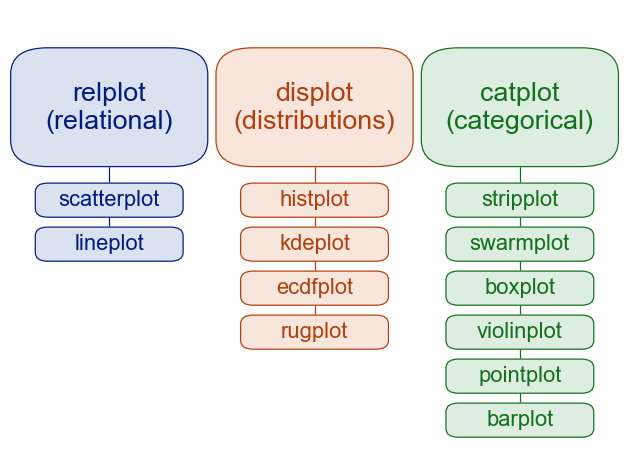

## Imports necessários

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# seta o visual para ficar no padrão
sns.set()

## Problema

### Leitura dos dados  
Para o problema da aula de hoje, vamos utilizar um conjunto de dados de pinguins.  
Nosso objetivo, é entender um pouco mais sobre o animal e tentar achar respostas para algumas hipóteses:

In [2]:
# lemos o conjunto de dados utilizando o load_dataset do próprio seaborn, feito para exemplos
df_pinguins = sns.load_dataset('penguins')
df_pinguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Para lermos melhor, vamos renomear as colunas para português:

In [3]:
columns = {
    'species': 'espécie',
    'island': 'ilha',
    'bill_length_mm': 'comprimento_bico_mm',
    'bill_depth_mm': 'profundidade_bico_mm',
    'flipper_length_mm': 'comprimento_nadadeira_mm',
    'body_mass_g': 'massa_corpo_g',
    'sex': 'sexo'
    
}
df_pinguins.rename(columns=columns, inplace=True)
df_pinguins.head()

,espécie,ilha,comprimento_bico_mm,profundidade_bico_mm,comprimento_nadadeira_mm,massa_corpo_g,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Bem melhor, né? :)

### Análise das variáveis

#### Distribuição do comprimento da nadadeira

displot simples, sem nenhum parâmetro:

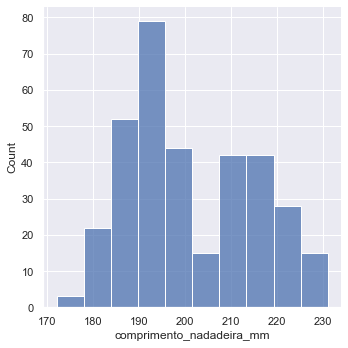

In [4]:
sns.displot(data=df_pinguins, x='comprimento_nadadeira_mm');

----

Agora, vamos começar a adicionar alguns parâmetros para brincarmos:

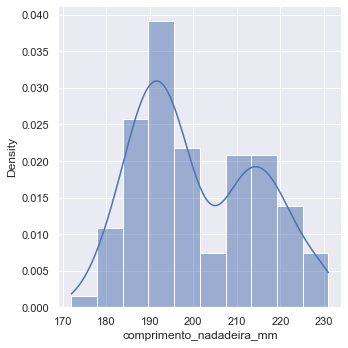

In [5]:
sns.displot(data=df_pinguins, x='comprimento_nadadeira_mm', stat='density', kde=True);

Trocamos o argumento ```stat``` do padrão para ```stat='density'```, o que nos traz um gráfico de densidade.  

--------

Se colocarmos ```stat='probability'```, ele nos traz, em relação a probabilidade:

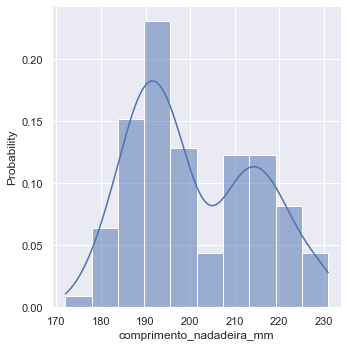

In [6]:
sns.displot(data=df_pinguins, x='comprimento_nadadeira_mm', stat='probability', kde=True);

---

Mas, e se quisermos comparar a distribuição em relação a espécie? Porque essa distribuição não está muito amigável. É difícil tirar alguma conclusão de bate pronto dela.  
Podemos adicionar no parâmetro ```hue```, a variável que queremos controlar! (É importante que a variável seja categórica)

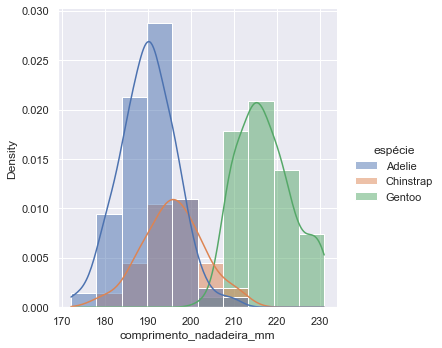

In [7]:
sns.displot(data=df_pinguins, x='comprimento_nadadeira_mm', hue='espécie',
            stat='density', kde=True);

----

Se quisermos adicionar ainda mais colunas categóricas para comparar, podemos!

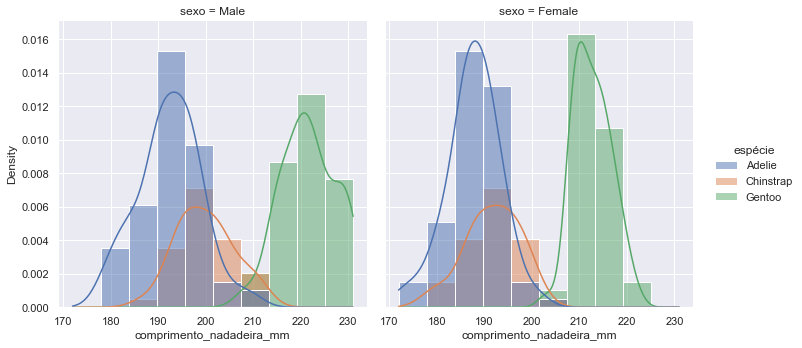

In [8]:
sns.displot(data=df_pinguins, x='comprimento_nadadeira_mm', hue='espécie', col='sexo',
            stat='density', kde=True);

Talvez, se tirarmos as barras, ele melhore um pouco a visualização: 

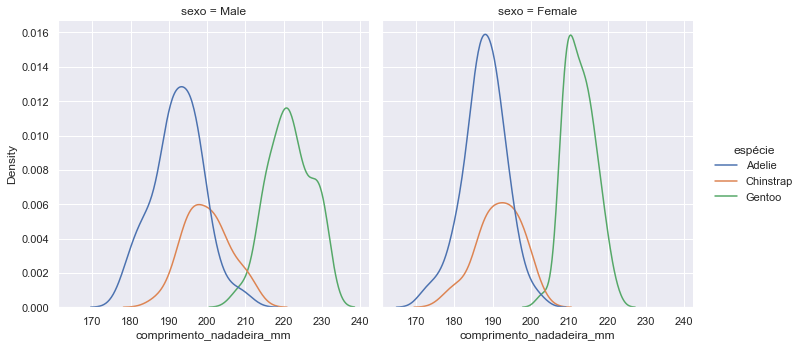

In [9]:
sns.displot(data=df_pinguins, x='comprimento_nadadeira_mm', kind="kde",
            hue='espécie', col='sexo');

---

#### Countplot 

Vamos agora dar uma olhada nas variáveis categóricas. Para isso, usaremos o ```countplot```:

Existe alguma diferença na quantidade de machos e fêmeas?

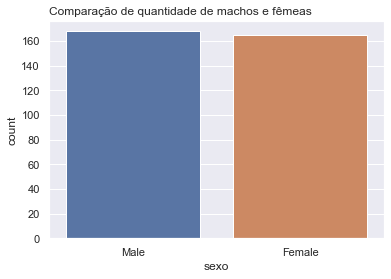

In [10]:
sns.countplot(data=df_pinguins, x='sexo');
plt.title('Comparação de quantidade de machos e fêmeas', loc='left');

Existe alguma ilha que concentra os pinguins?

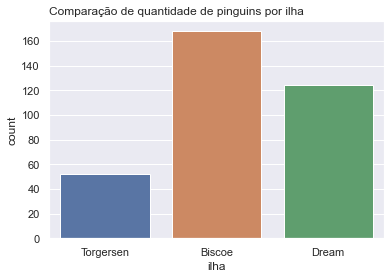

In [11]:
sns.countplot(data=df_pinguins, x='ilha');
plt.title('Comparação de quantidade de pinguins por ilha', loc='left');

Existe alguma diferença entre a quantidade de machos e fêmeas entre as ilhas?

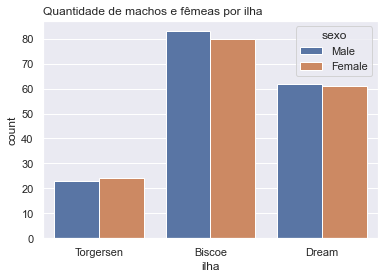

In [12]:
sns.countplot(data=df_pinguins, x='ilha', hue='sexo');
plt.title('Quantidade de machos e fêmeas por ilha', loc='left');

Existe alguma diferença entre a quantidade de espécies por ilha?

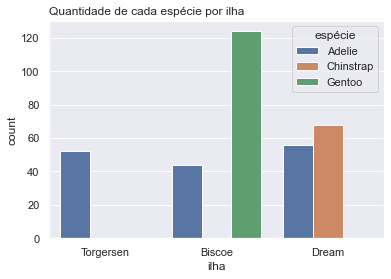

In [13]:
sns.countplot(data=df_pinguins, x='ilha', hue='espécie');
plt.title('Quantidade de cada espécie por ilha', loc='left');

----

#### Barplot

A linha preta em cima, representa o intervalo de confiança.

Será que o comprimento da nadadeira muda por espécie?

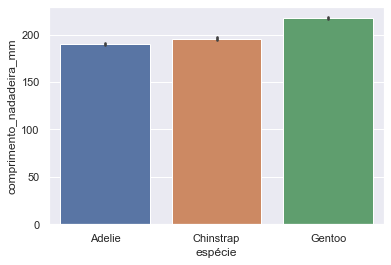

In [14]:
sns.barplot(x='espécie', y='comprimento_nadadeira_mm', data=df_pinguins);

E se adicionarmos o sexo?

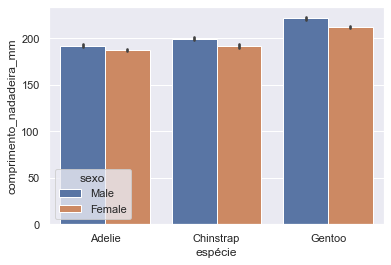

In [15]:
sns.barplot(x='espécie', y='comprimento_nadadeira_mm', data=df_pinguins, hue='sexo');

E o comprimento do bico?

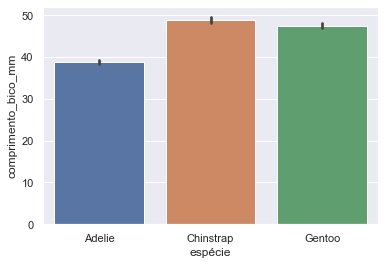

In [16]:
sns.barplot(x='espécie', y='comprimento_bico_mm', data=df_pinguins);

E se adicionarmos o sexo?

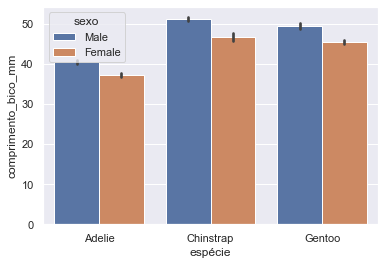

In [17]:
sns.barplot(x='espécie', y='comprimento_bico_mm', data=df_pinguins, hue='sexo');

E a profundidade do bico?

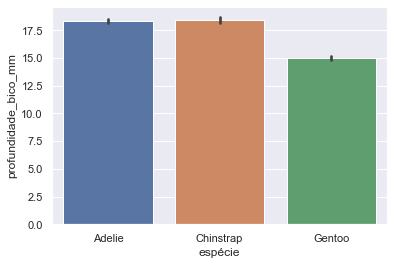

In [18]:
sns.barplot(x='espécie', y='profundidade_bico_mm', data=df_pinguins);

E se adicionarmos o sexo?

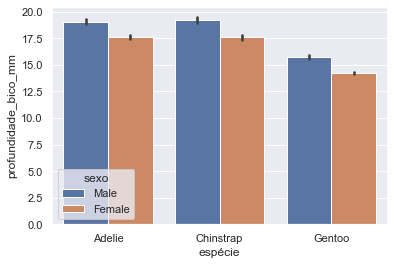

In [19]:
sns.barplot(x='espécie', y='profundidade_bico_mm', data=df_pinguins, hue='sexo');

---

Vamos fazer uma análise das estatísticas com o boxplot:

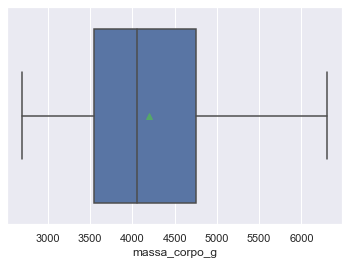

In [20]:
sns.boxplot(x='massa_corpo_g', data=df_pinguins, showmeans=True);

Podemos fazer em relação a variáveis categóricas tbm:

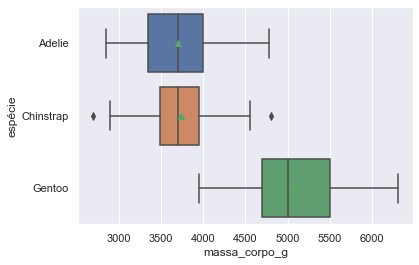

In [21]:
sns.boxplot(x='massa_corpo_g', y='espécie', data=df_pinguins, showmeans=True);

---

Vamos verificar a variação dos nossos dados:

Um gráfico de pontos representa uma estimativa de tendência central para uma variável numérica no gráfico de dispersão e fornece alguma indicação da incerteza em torno dessa estimativa usando barra de erro.

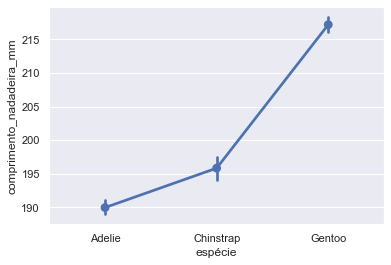

In [22]:
sns.pointplot(x='espécie', y='comprimento_nadadeira_mm', data=df_pinguins);

----

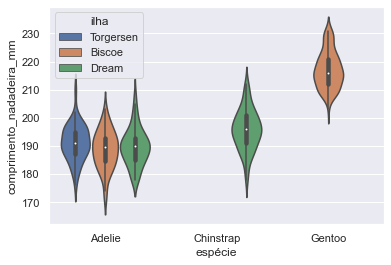

In [23]:
sns.violinplot(x='espécie', y='comprimento_nadadeira_mm', hue='ilha', data=df_pinguins);

----

Vamos ver se conseguimos uma regressão simples em relação aos dados.  
Utilizando ```comprimento_bico_mm``` e ```comprimento_nadadeira_mm```:

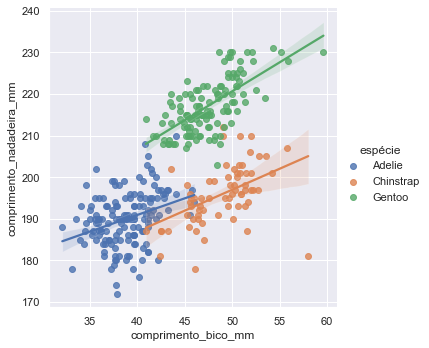

In [24]:
sns.lmplot(x='comprimento_bico_mm', y='comprimento_nadadeira_mm', hue='espécie', data=df_pinguins);

----

Vamos ver agora a correlação entre as variáveis, pra isso, podemos usar o gráfico de _heatmat_:

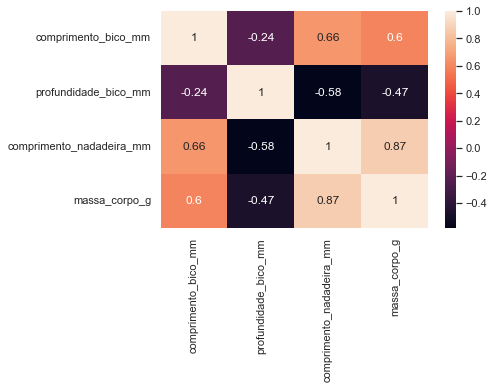

In [25]:
sns.heatmap(data=df_pinguins.corr(), annot=True);